In [11]:
from sklearn.metrics import jaccard_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist
from seriate import seriate


In [2]:
# Read data
URs_all_diseases = pd.read_table('/home/marsm05/Documents/CIA_UR_enrichment/UR_predictions_IMIDs_disease_Pvals.txt', sep = ',')

In [3]:
# Subset to only P1 and only those URs that are significant in at least 1 disease
URs_all_diseases = URs_all_diseases[URs_all_diseases['SP'] == 'P1']
IMID_count = list()
for i in range(len(URs_all_diseases)):
    IMID_count.append(sum(URs_all_diseases.iloc[i,8:] < 0.05))
URs_all_diseases = URs_all_diseases[np.array(IMID_count) > 0]
URs_all_diseases

In [6]:
# UR summary
UR_count = list()
for disease in URs_all_diseases.columns[8:]:
    UR_count.append(sum(URs_all_diseases[disease] < 0.05))


In [28]:
print('min: ' + str(np.min(UR_count)))
print('max: ' + str(np.max(UR_count)))
print('median: ' + str(np.median(UR_count)))
print('Percentage of URs that are only expressed in one disease: ' + \
      str(round(sum(np.array(IMID_count) == 1)/len(UR_count),2)))

min: 1
max: 8
median: 2.0
Percentage of URs that are only expressed in one disease: 0.48


In [32]:
# Compute jaccard score/intersections between URs
UR_table = list()
for i in range(len(URs_all_diseases)):
    UR_row = list()
    for j in range(len(URs_all_diseases)):
        #UR_row.append(sum((URs_all_diseases.iloc[i,[8,10,12,13,15,16,18,19,20,21,22,25,26]] < 0.05) & (URs_all_diseases.iloc[j,[8,10,12,13,15,16,18,19,20,21,22,25,26]] < 0.05)))
        UR_row.append(sum((URs_all_diseases.iloc[i,8:] < 0.05) & (URs_all_diseases.iloc[j,8:] < 0.05)))
        #UR_row.append(jaccard_score(URs_all_diseases.iloc[i,[8,10,12,13,15,16,18,19,20,21,22,25,26]] < 0.05, URs_all_diseases.iloc[j,[8,10,12,13,15,16,18,19,20,21,22,25,26]] < 0.05))
        #UR_row.append(jaccard_score(URs_all_diseases.iloc[i,8:] < 0.05, URs_all_diseases.iloc[j,8:] < 0.05))

    UR_table.append(UR_row)
UR_table = pd.DataFrame(UR_table)
UR_table.index = URs_all_diseases['UR']
UR_table.columns = URs_all_diseases['UR']

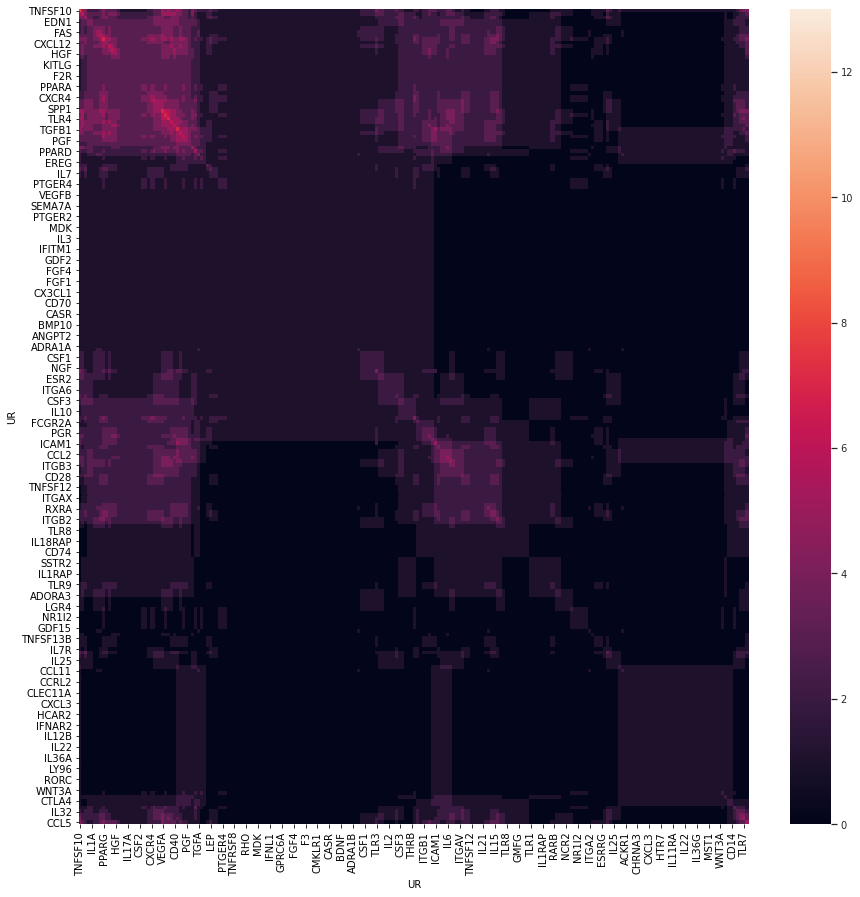

In [13]:
# Clustering and plotting the jaccard index
elements = UR_table
ord1 = seriate(pdist(elements))   
UR_table_sorted = UR_table.iloc[ord1, ord1]


fig, ax = plt.subplots(figsize=(15, 15)) 
sns.set(font_scale=0.9)
result = sns.heatmap(UR_table_sorted, vmin = 0, vmax = 13)


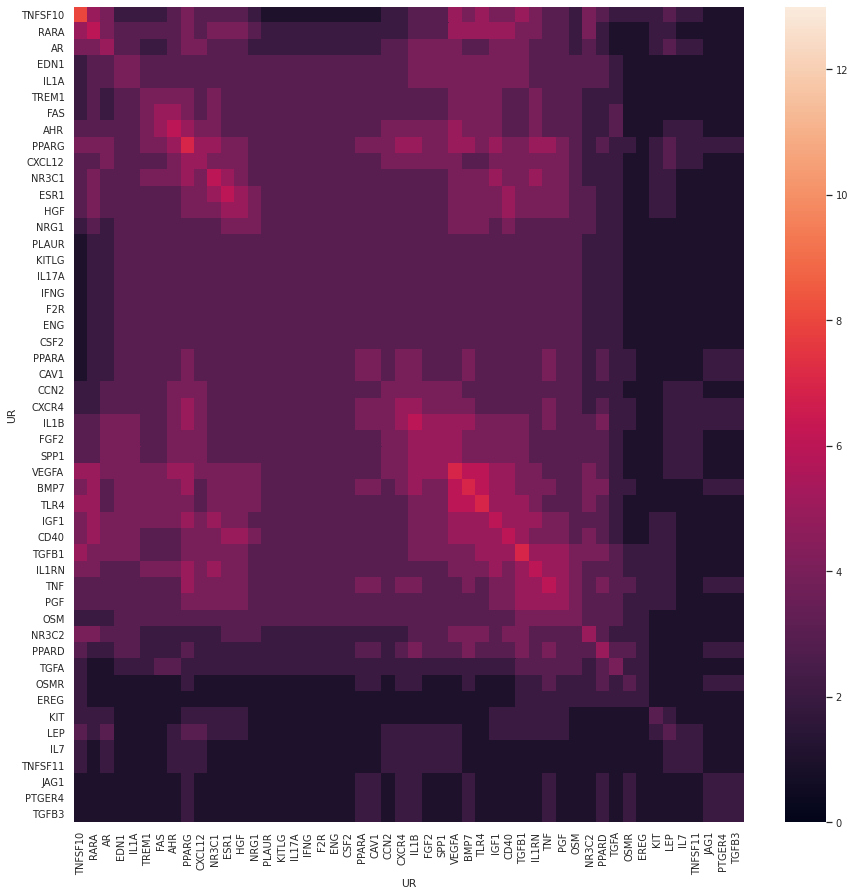

In [14]:
# Clustering and plotting the subset of URs

fig, ax = plt.subplots(figsize=(15, 15)) 

sns.set(font_scale=0.9)
result = sns.heatmap(UR_table_sorted.iloc[:50,:50], vmin = 0, vmax = 13)

# Analogically the same analysis for diseases

In [33]:
UR_table = list()
for i in range(19):
    UR_row = list()
    for j in range(19):
        #UR_row.append(sum((URs_all_diseases.iloc[:,i+8] < 0.05) & (URs_all_diseases.iloc[:,j+8] < 0.05)))
        UR_row.append(jaccard_score(URs_all_diseases.iloc[:,i+8] < 0.05, URs_all_diseases.iloc[:,j+8] < 0.05))

    UR_table.append(UR_row)
UR_table = pd.DataFrame(UR_table)
UR_table.index = URs_all_diseases.columns[8:]
UR_table.columns = URs_all_diseases.columns[8:]

/opt/conda/3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.p

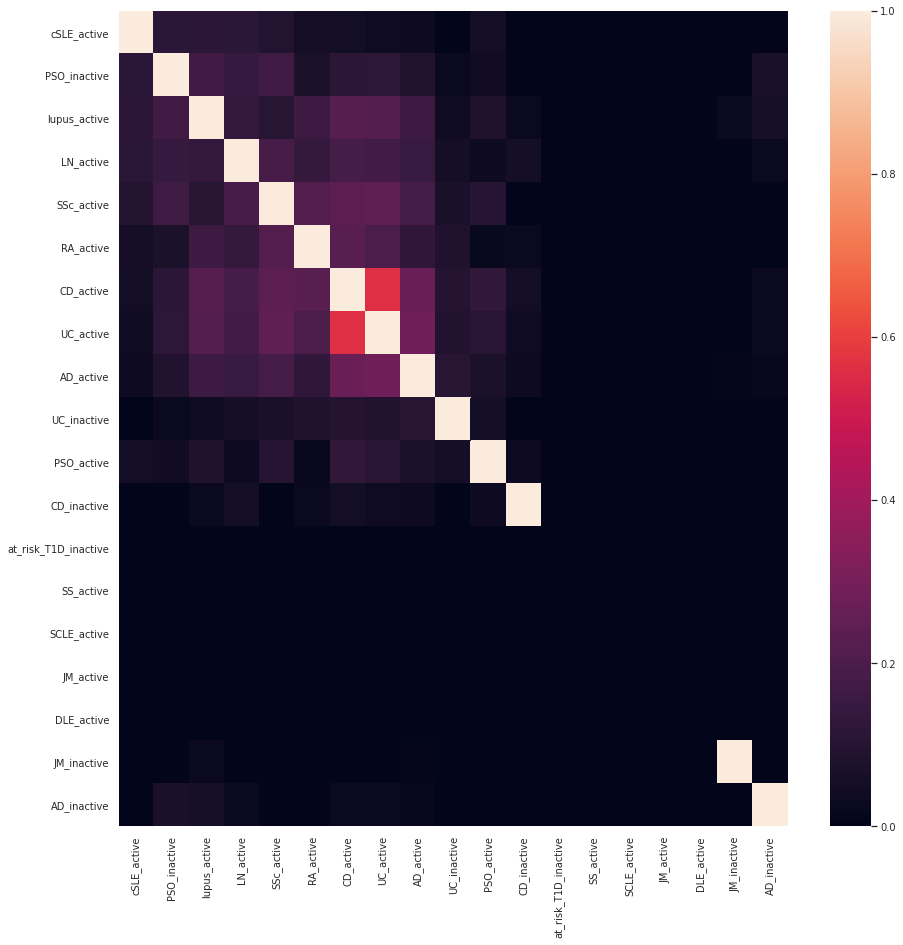

In [34]:
#clustering
elements = UR_table
ord1 = seriate(pdist(elements))   
UR_table = UR_table.iloc[ord1, ord1]

fig, ax = plt.subplots(figsize=(15, 15)) 
sns.set(font_scale=0.9)
result = sns.heatmap(UR_table, vmin = 0, vmax = UR_table.max().max())